# PBL 2: Prediction of PTM cross-talk

* Original paper: [Systematic Characterization and Prediction of Post-Translational Modification Cross-Talk](https://www.mcponline.org/article/S1535-9476(20)33238-2/fulltext)
* Data: [PTMX_v1_0.csv.gz](https://github.com/huangyh09/nnwrapper/blob/main/examples/data/PTMX_v1_0.csv.gz)

You may also run it on Google Colab with this link: [PBL2_PTMX_prediction.ipynb](https://colab.research.google.com/github/huangyh09/nnwrapper/blob/main/examples/PBL2_PTMX_prediction.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://github.com/huangyh09/nnwrapper/raw/main/examples/data/PTMX_v1_0.csv.gz')

In [3]:
df

,protein,amino_acid1,PTM1,amino_acid2,PTM2,seq_distance,3D_distance,is_disorded,coevolution,cooccurency,crosstalk_label
0,P31749,T305,O-GlcNAcylation,T308,phosphorylation,3,NaN,0,1.0000,0.6667,1
1,P31749,T312,O-GlcNAcylation,T308,phosphorylation,4,11.3046,0,1.0000,0.6667,1
2,P04083,Y21,phosphorylation,K257,SUMOylation,236,NaN,0,0.0568,0.6667,1
3,P25054,S1505,phosphorylation,S1501,phosphorylation,4,NaN,0,1.0000,0.3333,1
4,P25054,S1501,phosphorylation,S1504,phosphorylation,3,NaN,0,1.0000,0.3333,1
...,...,...,...,...,...,...,...,...,...,...,...
9799,Q9Y6Q9,T1067,PHOSPHORYLATION,K1194,SUMOYLATION,127,NaN,0,0.4060,0.3333,0
9800,Q9Y6Q9,T1067,PHOSPHORYLATION,Y1357,PHOSPHORYLATION,290,NaN,0,0.1645,0.3333,0
9801,Q9Y6Q9,T1114,PHOSPHORYLATION,K1194,SUMOYLATION,80,NaN,0,0.3723,0.3333,0
9802,Q9Y6Q9,T1114,PHOSPHORYLATION,Y1357,PHOSPHORYLATION,243,NaN,0,0.1599,0.3333,0


### Check positive and negative samples

In [4]:
df[df['crosstalk_label'] == 1]

,protein,amino_acid1,PTM1,amino_acid2,PTM2,seq_distance,3D_distance,is_disorded,coevolution,cooccurency,crosstalk_label
0,P31749,T305,O-GlcNAcylation,T308,phosphorylation,3,NaN,0,1.0000,0.6667,1
1,P31749,T312,O-GlcNAcylation,T308,phosphorylation,4,11.3046,0,1.0000,0.6667,1
2,P04083,Y21,phosphorylation,K257,SUMOylation,236,NaN,0,0.0568,0.6667,1
3,P25054,S1505,phosphorylation,S1501,phosphorylation,4,NaN,0,1.0000,0.3333,1
4,P25054,S1501,phosphorylation,S1504,phosphorylation,3,NaN,0,1.0000,0.3333,1
...,...,...,...,...,...,...,...,...,...,...,...
188,P46937,S397,phosphorylation,S403,phosphorylation,6,NaN,1,0.8175,NaN,1
189,P25490,S180,phosphorylation,K178,acetylation,2,NaN,1,0.5961,NaN,1
190,P25490,S180,phosphorylation,K179,acetylation,1,NaN,1,0.6625,NaN,1
191,P25490,S184,phosphorylation,K182,acetylation,2,NaN,1,0.7722,NaN,1


In [5]:
df[df['crosstalk_label'] == 0]

,protein,amino_acid1,PTM1,amino_acid2,PTM2,seq_distance,3D_distance,is_disorded,coevolution,cooccurency,crosstalk_label
193,O14920,S4,PHOSPHORYLATION,S6,PHOSPHORYLATION,2,5.6161,1,0.7272,0.3333,0
194,O14920,S4,PHOSPHORYLATION,T23,PHOSPHORYLATION,19,28.1569,0,0.5100,0.3333,0
195,O14920,S4,PHOSPHORYLATION,K163,UBIQUITINATION,159,40.2699,0,0.0484,0.3333,0
196,O14920,S4,PHOSPHORYLATION,Y169,PHOSPHORYLATION,165,41.2055,0,0.0484,0.3333,0
197,O14920,S4,PHOSPHORYLATION,S177,PHOSPHORYLATION,173,NaN,0,0.0484,0.3333,0
...,...,...,...,...,...,...,...,...,...,...,...
9799,Q9Y6Q9,T1067,PHOSPHORYLATION,K1194,SUMOYLATION,127,NaN,0,0.4060,0.3333,0
9800,Q9Y6Q9,T1067,PHOSPHORYLATION,Y1357,PHOSPHORYLATION,290,NaN,0,0.1645,0.3333,0
9801,Q9Y6Q9,T1114,PHOSPHORYLATION,K1194,SUMOYLATION,80,NaN,0,0.3723,0.3333,0
9802,Q9Y6Q9,T1114,PHOSPHORYLATION,Y1357,PHOSPHORYLATION,243,NaN,0,0.1599,0.3333,0


### Examine some features

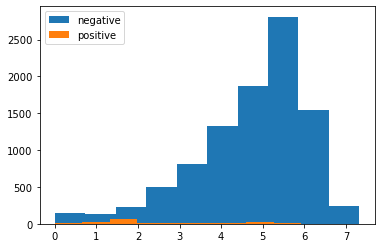

In [6]:
fig = plt.figure()
plt.hist(np.log(df[df['crosstalk_label'] == 0]['seq_distance']), label='negative')
plt.hist(np.log(df[df['crosstalk_label'] == 1]['seq_distance']), label='positive')
plt.legend()
plt.show()

## How to handle missing values?

**Required: describe your strategy in text**

* how did the paper do?
* is it possible for logistic regression? what's your approach?

## How to handle imbalance between positive and negative samples?

**Required: describe your strategy in text**

* how did the paper do?
* is there any option?

## How to assess the model performance?

**Required: Plot an ROC curve**

* How to inteprete ROC curve
* How to specify a threshold, what are the according TPR and FPR?
* How about precision? Is it important here?

## Is there any issue with common train-test split over the whole dataset? 

**Required: Plot an ROC curve on the test set**
* Comsider TP53 (UniProt ID: P04637) as an example test protein.
* Check how the paper did

In [7]:
# df[(df['crosstalk_label'] == 1) * (df['protein'] == 'P04637')]

df[(df['crosstalk_label'] == 0) * (df['protein'] == 'P04637')]

,protein,amino_acid1,PTM1,amino_acid2,PTM2,seq_distance,3D_distance,is_disorded,coevolution,cooccurency,crosstalk_label
2629,P04637,S6,PHOSPHORYLATION,S9,PHOSPHORYLATION,3,6.3928,1,0.4199,1.0000,0
2630,P04637,S6,PHOSPHORYLATION,S15,PHOSPHORYLATION,9,20.2886,1,0.3341,1.0000,0
2631,P04637,S6,PHOSPHORYLATION,T18,PHOSPHORYLATION,12,19.2864,0,0.4496,1.0000,0
2632,P04637,S6,PHOSPHORYLATION,S20,PHOSPHORYLATION,14,21.0196,0,0.5102,1.0000,0
2633,P04637,S6,PHOSPHORYLATION,S33,PHOSPHORYLATION,27,41.3799,0,0.3682,0.3333,0
...,...,...,...,...,...,...,...,...,...,...,...
3629,P04637,S378,PHOSPHORYLATION,K381,ACETYLATION,3,5.9151,1,0.1542,1.0000,0
3630,P04637,K381,ACETYLATION,K382,ACETYLATION,1,3.8094,1,0.5550,1.0000,0
3631,P04637,K381,ACETYLATION,K386,ACETYLATION,5,9.1240,1,0.3017,0.6667,0
3632,P04637,K381,ACETYLATION,T387,PHOSPHORYLATION,6,9.5119,1,0.2971,0.6667,0
